In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


In [16]:
# Load the dataset
df = pd.read_csv('final_dataset_encoded.csv', low_memory=False)


df['year_index'] = pd.Series(df['academicYear']).rank(method='dense').astype(int)

# Set academicYear as index if needed
df.set_index('year_index', inplace=True)

# # Display the DataFrame
# print("DataFrame with year index:")
# print(df.head())

df.to_csv('final_dataset_encoded_with_year_index.csv')

df_2019 = df.loc[1]  # Based on your date format
print("DataFrame with year index 2019:" ,df_2019.head())

DataFrame with year index 2019:             academicYear  universityName  faculty  departmentName  \
year_index                                                          
1                   2019               0      194             419   
1                   2019               0      201              49   
1                   2019               0      201             133   
1                   2019               0      201             152   
1                   2019               0      201             391   

                 idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
year_index                                                                   
1           106510014.0                0     62             62         0.0   
1           106510077.0                0     62             62         0.0   
1           106510068.0                0     62             62         0.0   
1           106510023.0                0     62             62         0.0   
1           1065

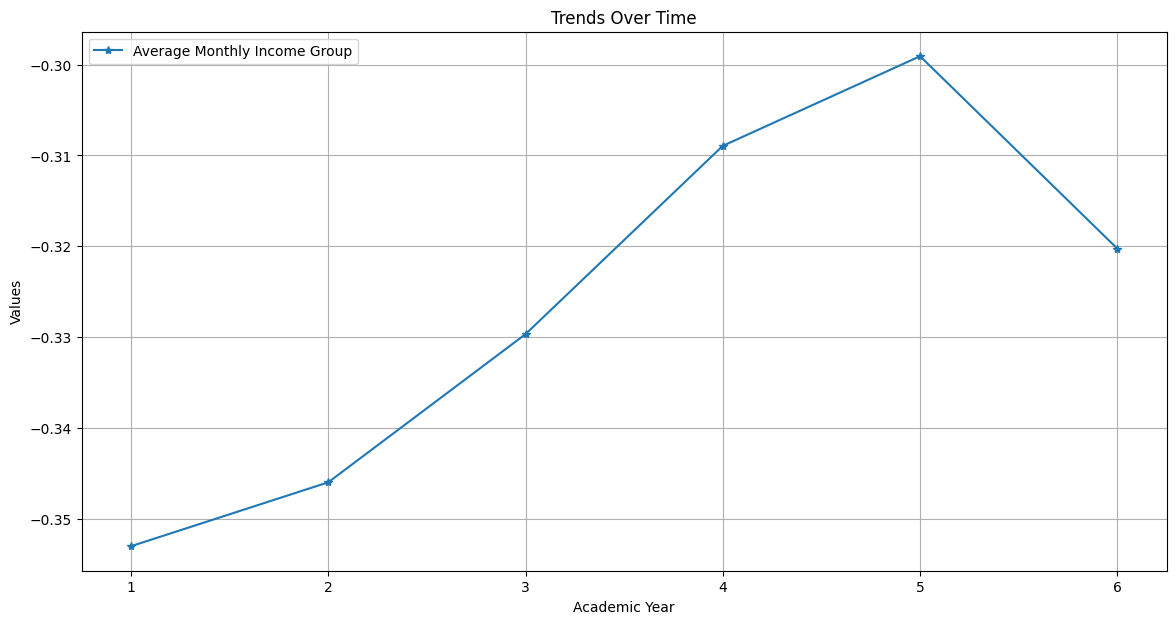

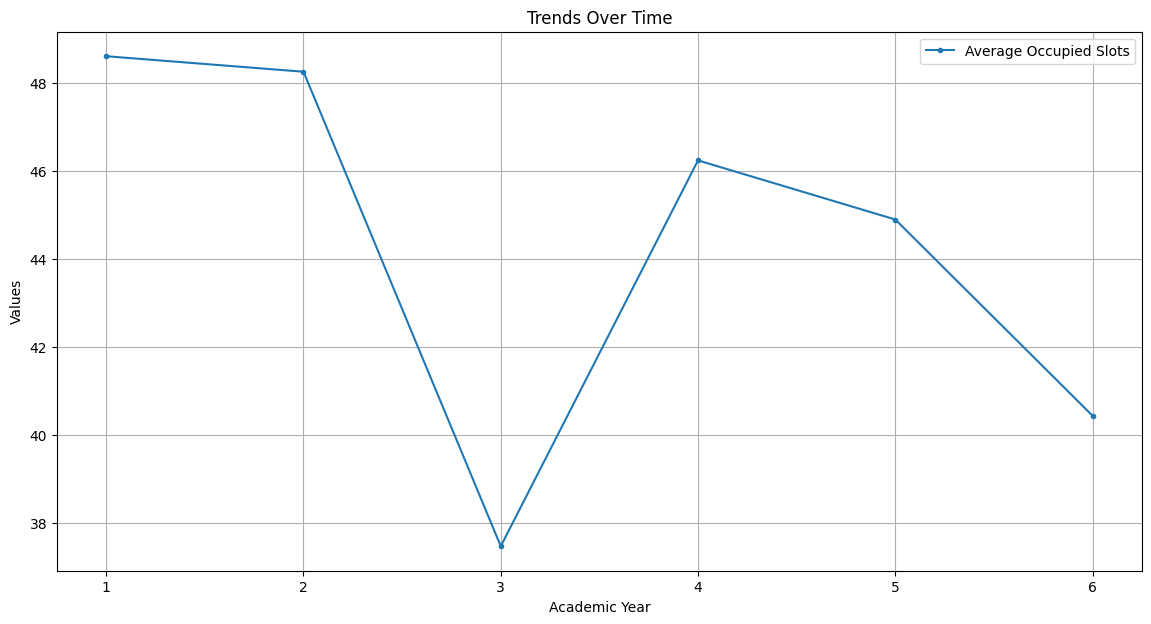

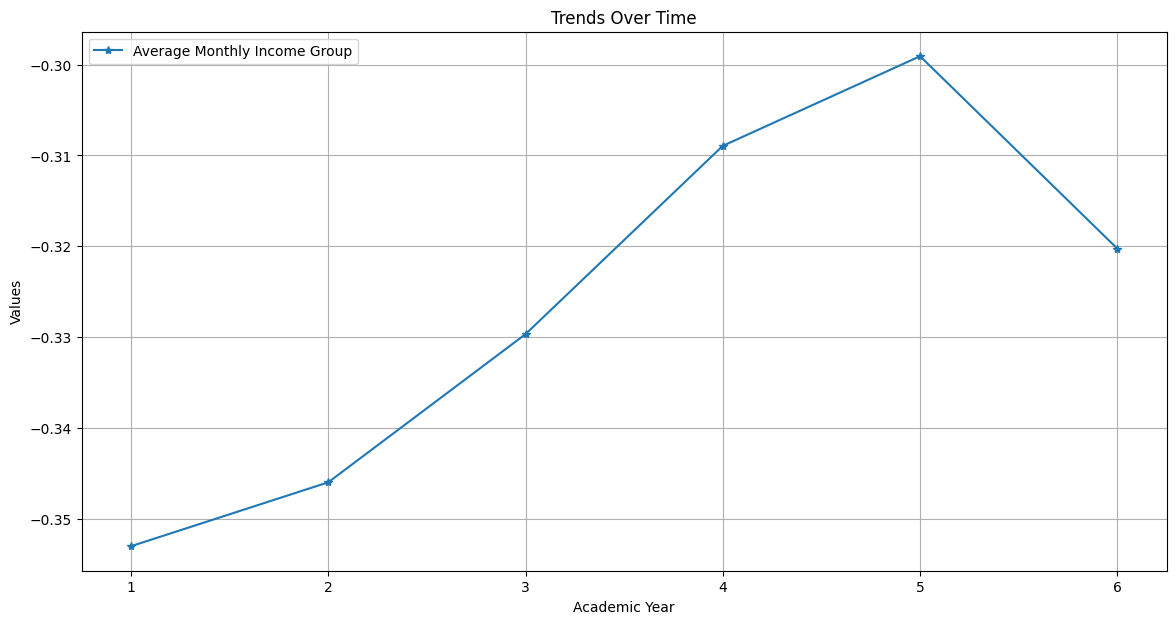

In [3]:
# Line Plot: Visualize trends over time for different metrics
plt.figure(figsize=(14, 7))
plt.plot(df.groupby(df.index)['avg_monthly_income_group'].mean(), marker='*', label='Average Monthly Income Group')
plt.xlabel('Academic Year')
plt.ylabel('Values')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Line Plot: Visualize trends over time for different metrics
plt.figure(figsize=(14, 7))
plt.plot(df.groupby(df.index)['occupiedSlots'].mean(), marker='.', label='Average Occupied Slots')
plt.xlabel('Academic Year')
plt.ylabel('Values')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Line Plot: Visualize trends over time for different metrics
plt.figure(figsize=(14, 7))
plt.plot(df.groupby(df.index)['avg_monthly_income_group'].mean(), marker='*', label='Average Monthly Income Group')
plt.xlabel('Academic Year')
plt.ylabel('Values')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

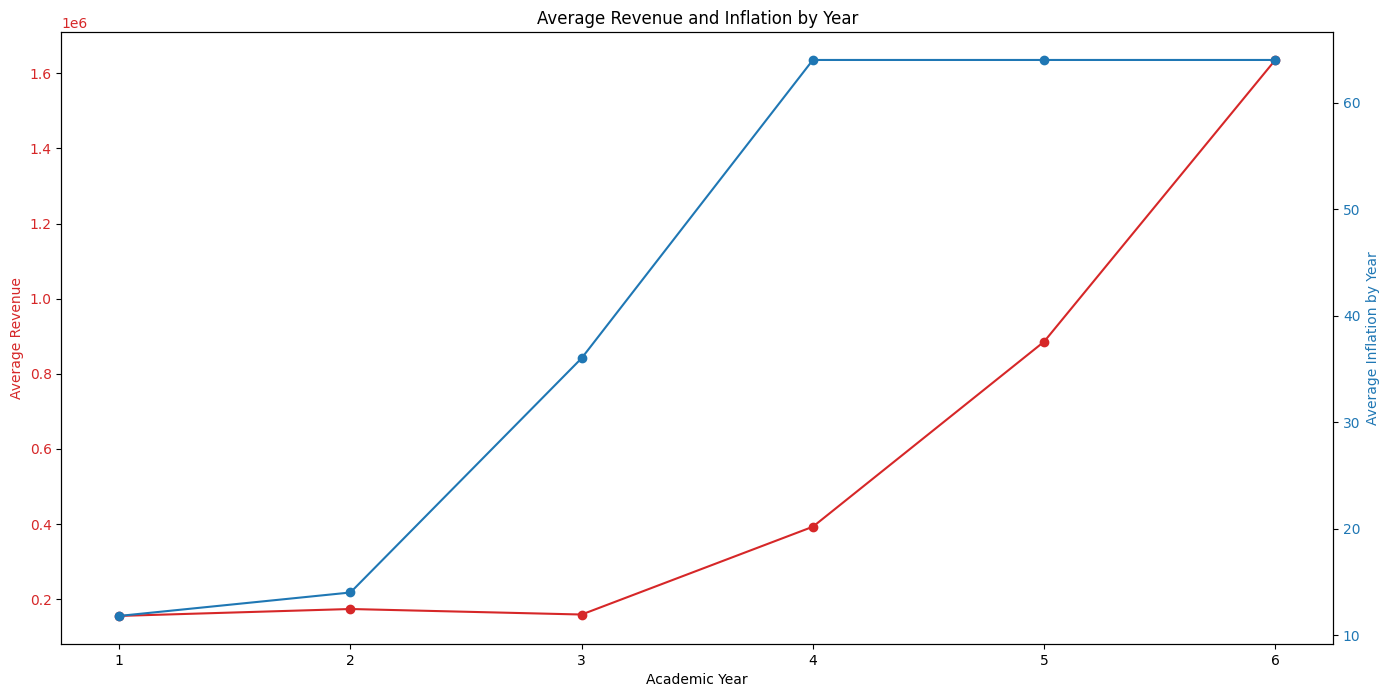

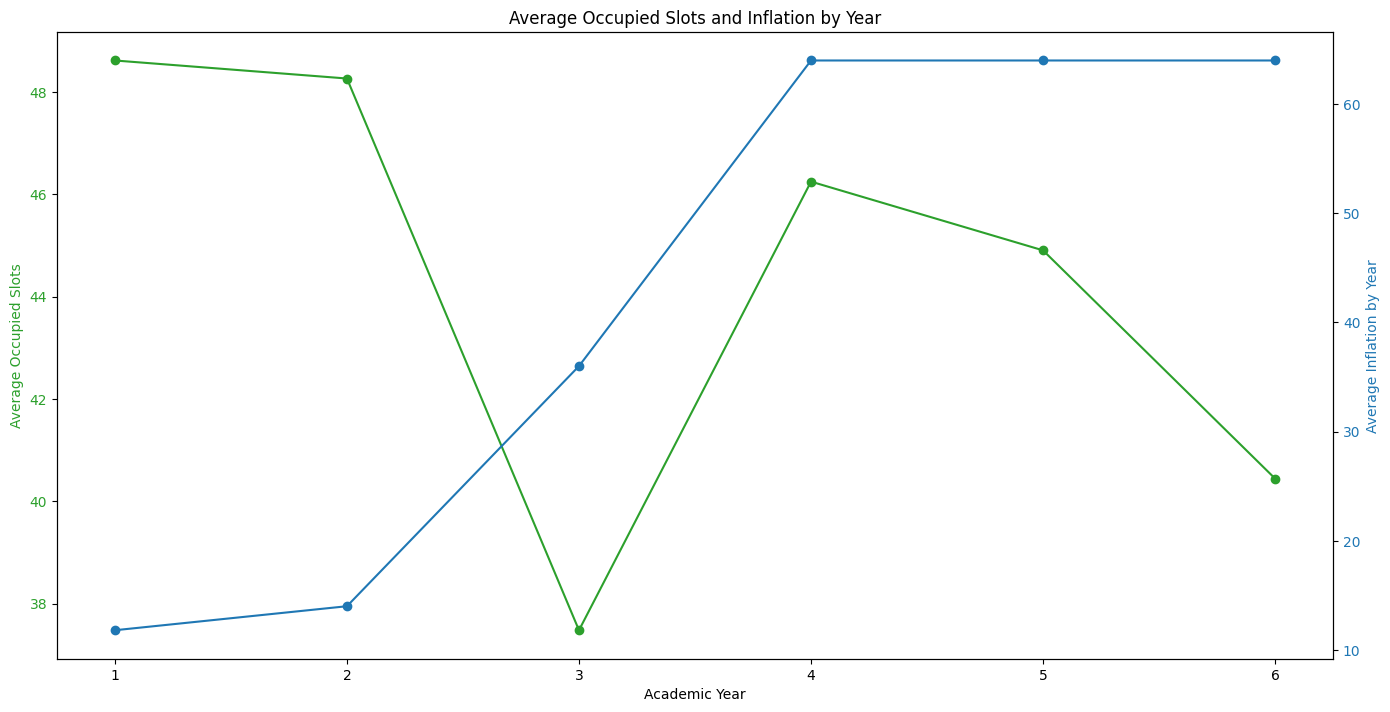

In [4]:
# Calculate the average revenue and inflation_by_year
avg_revenue = df.groupby(df.index)['revenue'].mean()
avg_occupied_slots = df.groupby(df.index)['occupiedSlots'].mean()
avg_inflation_by_year = df.groupby(df.index)['inflation_by_year'].mean()

# Plot average revenue and inflation_by_year
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Academic Year')
ax1.set_ylabel('Average Revenue', color=color)
ax1.plot(avg_revenue.index, avg_revenue, color=color, marker='o', label='Average Revenue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Inflation by Year', color=color)
ax2.plot(avg_inflation_by_year.index, avg_inflation_by_year, color=color, marker='o', label='Average Inflation by Year')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Revenue and Inflation by Year')
plt.show()

# Plot average occupied slots and inflation_by_year
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:green'
ax1.set_xlabel('Academic Year')
ax1.set_ylabel('Average Occupied Slots', color=color)
ax1.plot(avg_occupied_slots.index, avg_occupied_slots, color=color, marker='o', label='Average Occupied Slots')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Inflation by Year', color=color)
ax2.plot(avg_inflation_by_year.index, avg_inflation_by_year, color=color, marker='o', label='Average Inflation by Year')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Occupied Slots and Inflation by Year')
plt.show()

In [ ]:


binary_features = [
    'universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 
    'programType_SAY', 'programType_SÖZ', 'language_Almanca', 'language_Arapça', 'language_Bulgarca',  
    'language_Ermenice', 'language_Fransızca', 'language_Korece', 'language_Lehçe', 'language_Rusça', 
    'language_Türkçe', 'language_Çince', 'language_İngilizce', 'language_İspanyolca', 'language_İtalyanca', 
    'baseRanking','academicYear'
]
print(df[binary_features].describe().round(3))
print(len(binary_features))



       universityType_devlet  universityType_vakıf  programType_DİL  \
count              52221.000             52221.000        52221.000   
mean                   0.605                 0.395            0.049   
std                    0.489                 0.489            0.216   
min                    0.000                 0.000            0.000   
25%                    0.000                 0.000            0.000   
50%                    1.000                 0.000            0.000   
75%                    1.000                 1.000            0.000   
max                    1.000                 1.000            1.000   

       programType_EA  programType_SAY  programType_SÖZ  language_Almanca  \
count       52221.000        52221.000        52221.000         52221.000   
mean            0.324            0.456            0.172             0.004   
std             0.468            0.498            0.377             0.063   
min             0.000            0.000            0.

In [6]:

numeric_features = []
for feature in df.columns:
    if feature not in binary_features:
        numeric_features.append(feature)
        
print(len(numeric_features))

41


In [7]:
skew_values = df[numeric_features].skew()

skew_features = skew_values[abs(skew_values) > 1.5].index.tolist()

print("Skewed Features:", skew_features)
print(len(skew_features))

continuous_features = [col for col in numeric_features if col not in skew_features]

print("Continous Features:", continuous_features)
print(len(continuous_features))

Skewed Features: ['quota', 'occupiedSlots', 'tuitionFee', 'profCount', 'assoCount', 'docCount', 'topRanking', 'avgAdmissionRanking(TYT)', 'stdDeviationStudents', 'revenue', 'totalPreference', 'top1PreferenceRatio', 'avgAdmittedStudentPrefOrder', 'top1AdmittedRatio', 'top10AdmittedRatio', 'admittedTotalPref', 'admittedTotalDepartmentPref', 'currentStudentCount', 'totalForeignStudents']
19
Continous Features: ['universityName', 'faculty', 'departmentName', 'idOSYM', 'scholarshipRate', 'universityLocation', 'universityRegion', 'baseAdmissionRanking(TYT)', 'outOfCityStudentRate', 'avgOrderofPreference', 'top3AdmittedRatio', 'baseScore', 'topScore', 'totalStudentNumber', 'Urap_Rank', 'Urap_Score', 'avg_monthly_income_group', 'Time_for_employment', 'employment_rate', 'base_salary_by_year', 'inflation_by_year', 'growth_by_year']
22


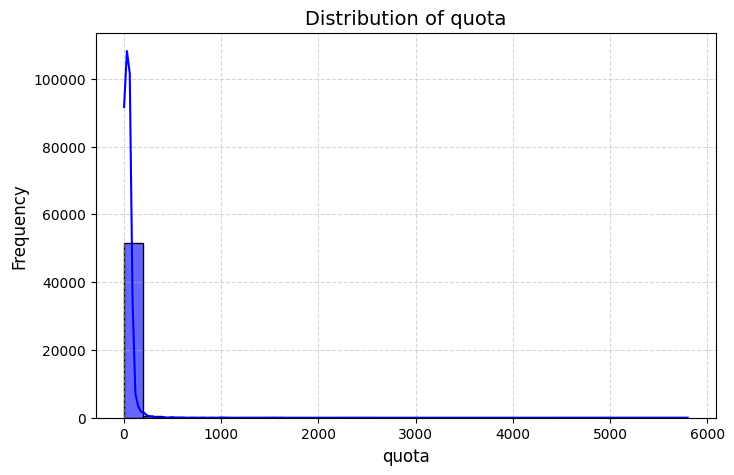

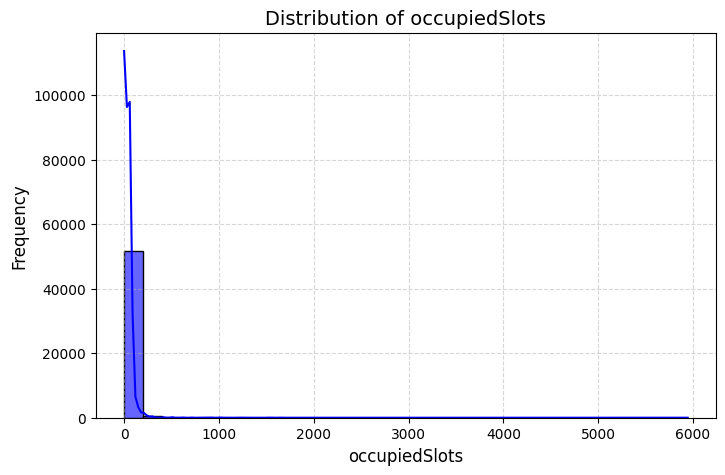

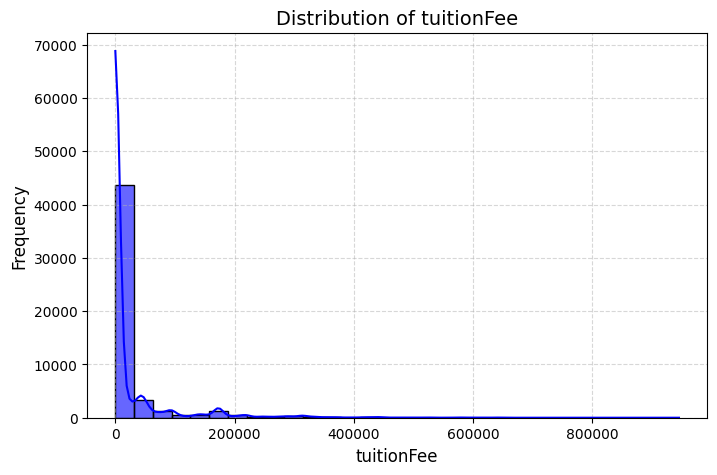

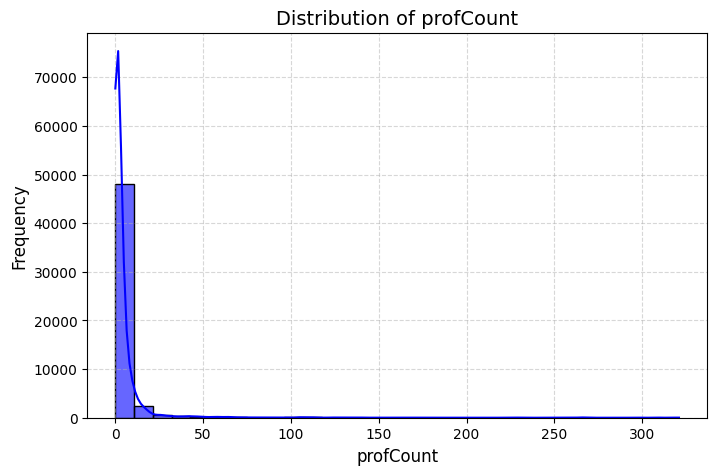

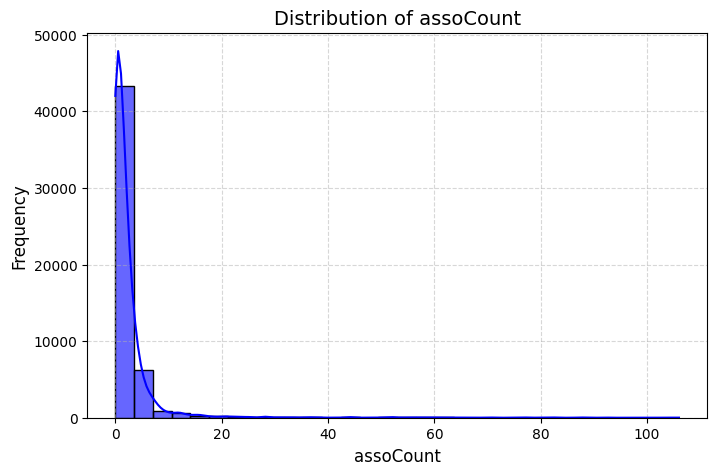

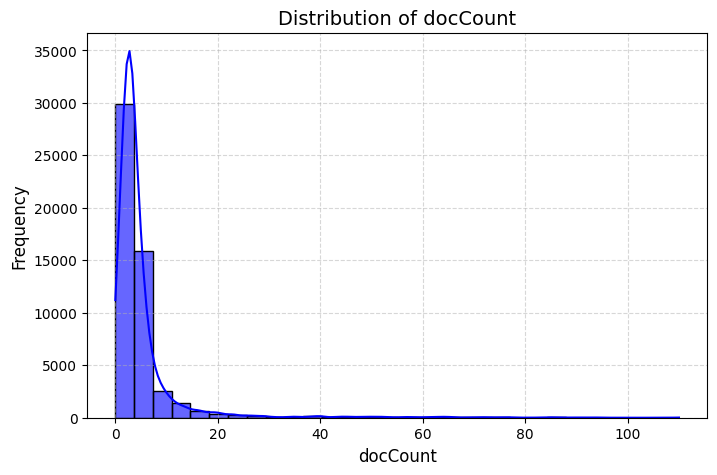

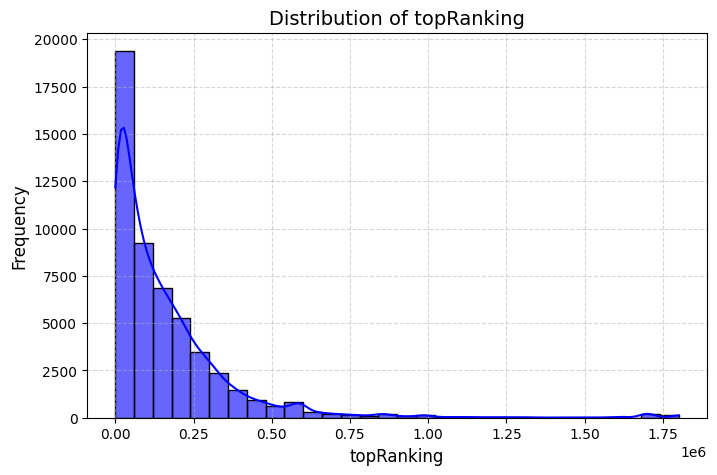

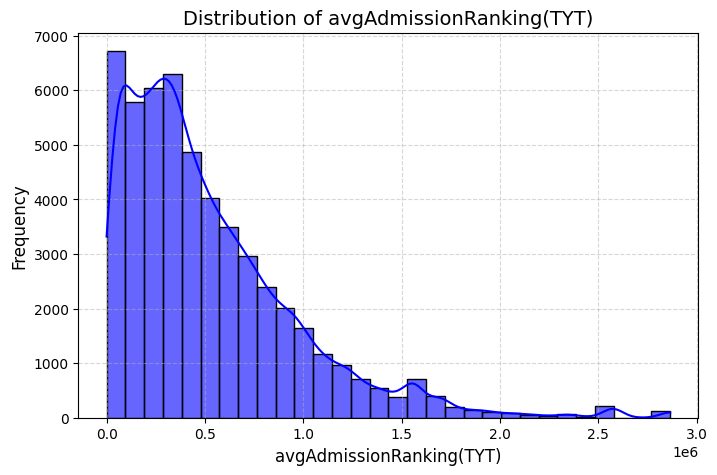

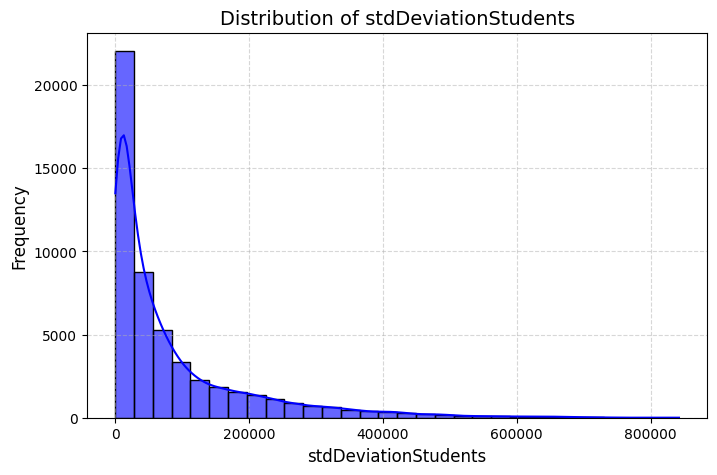

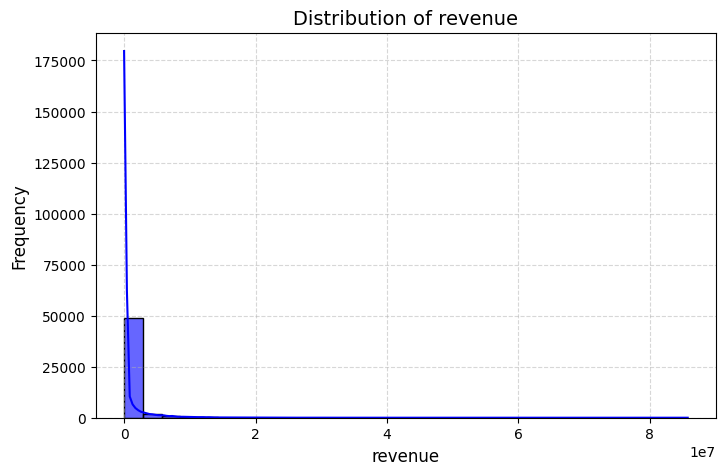

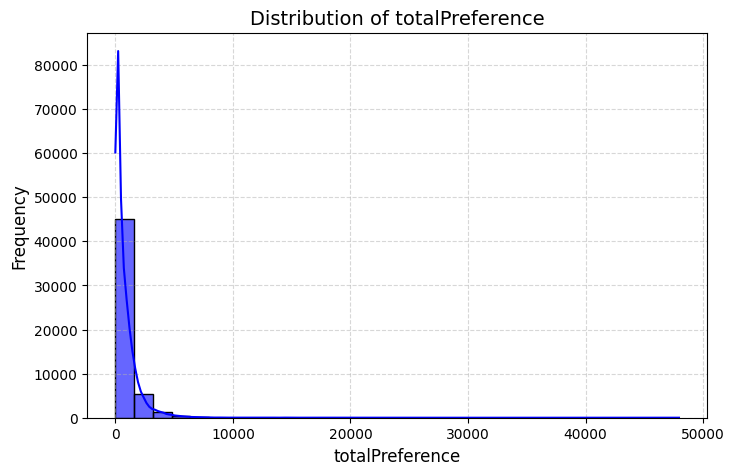

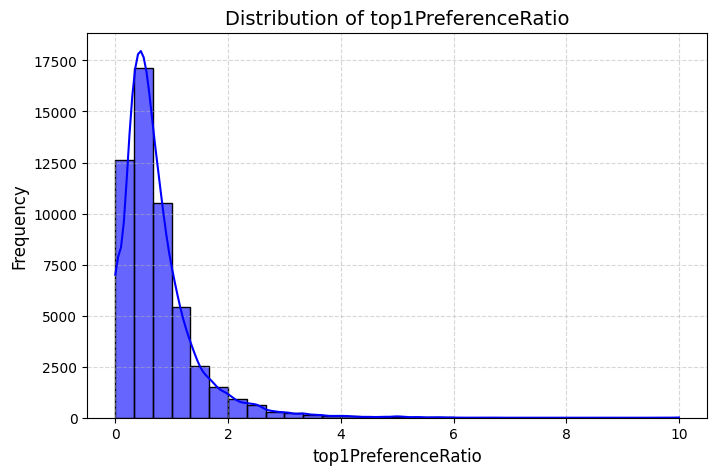

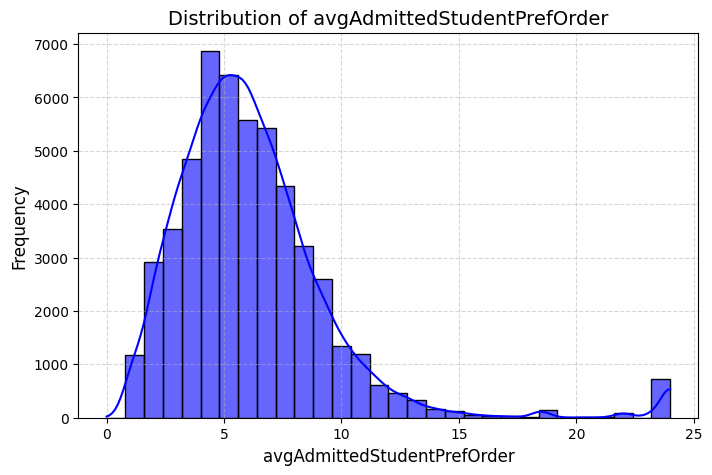

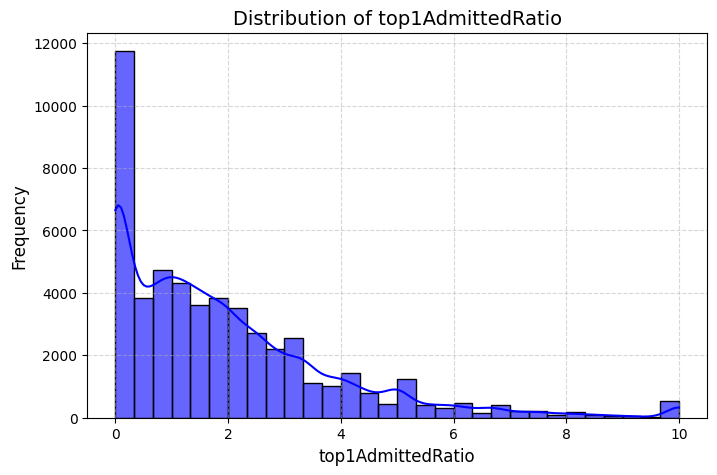

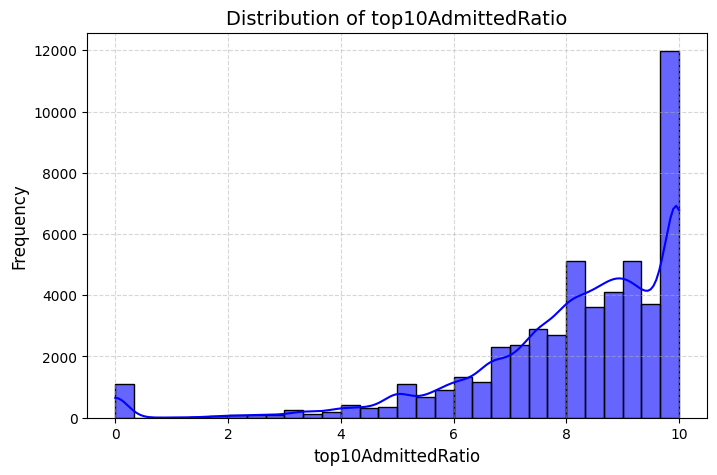

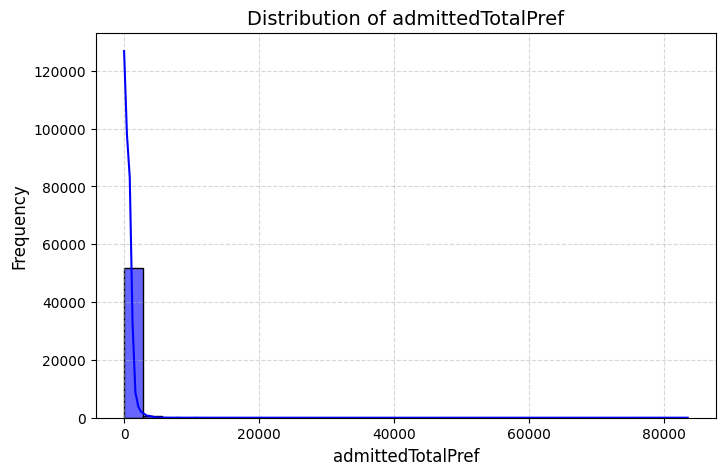

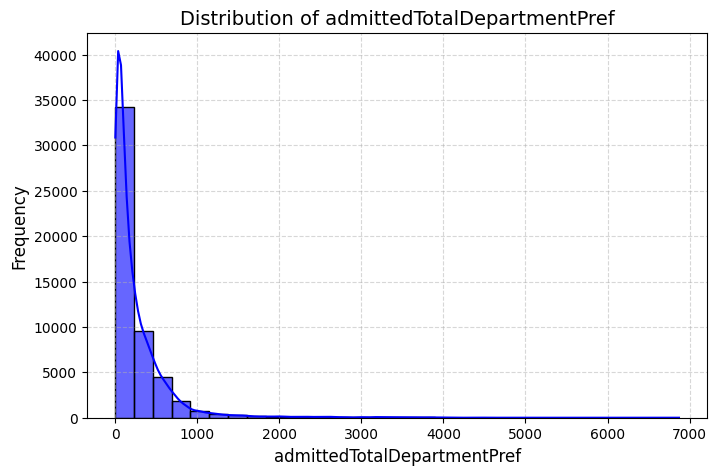

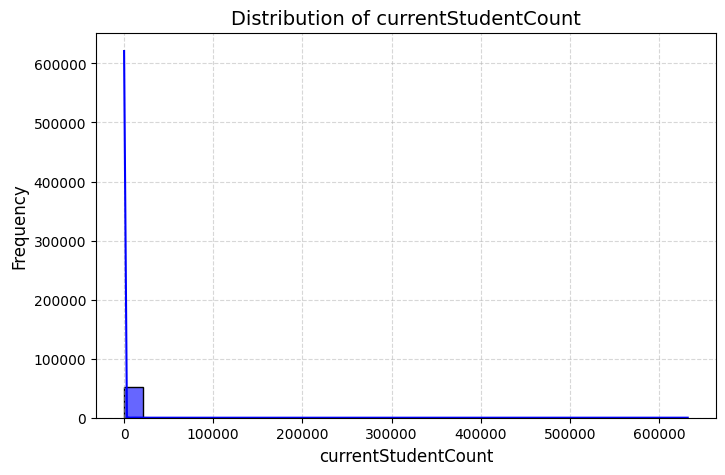

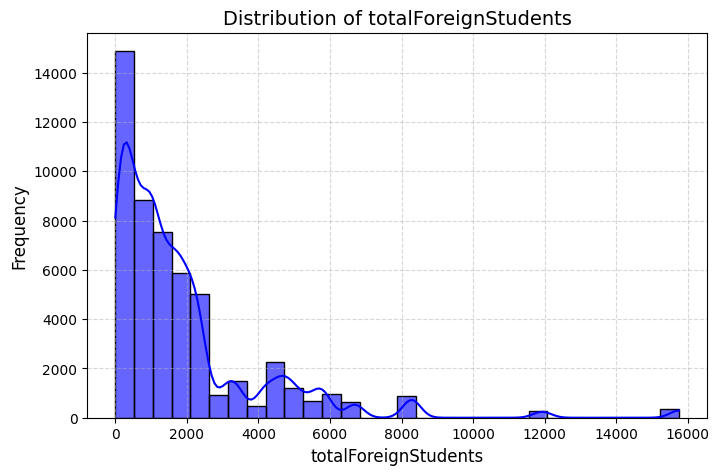

In [8]:
def plot_skewed_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_skewed_features(df, skew_features)

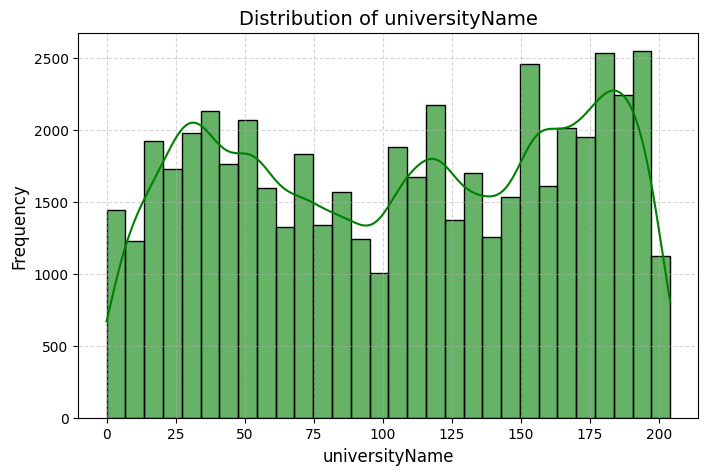

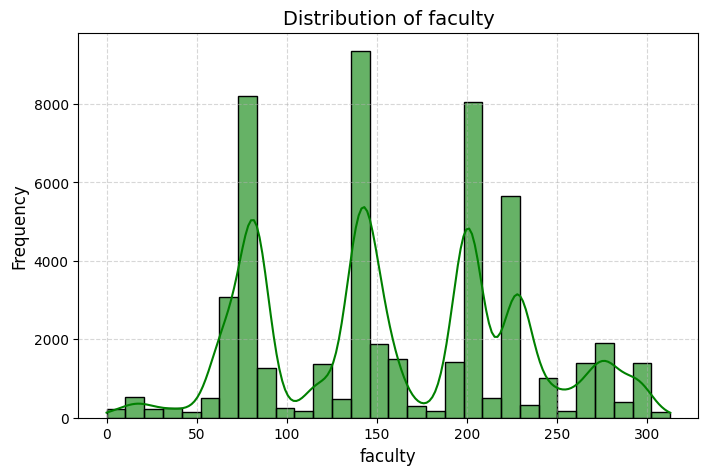

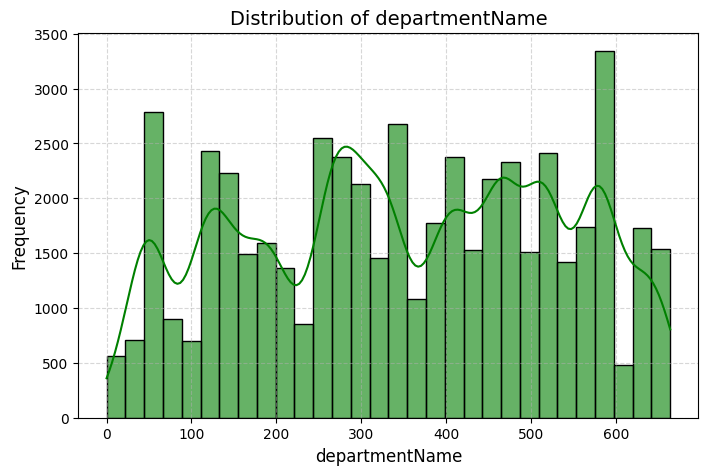

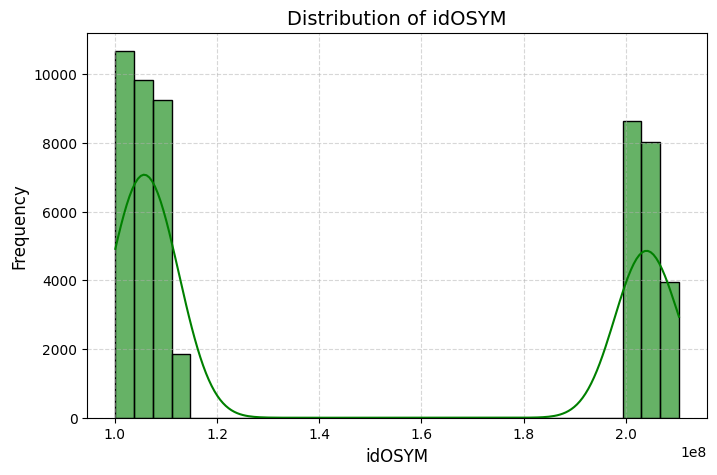

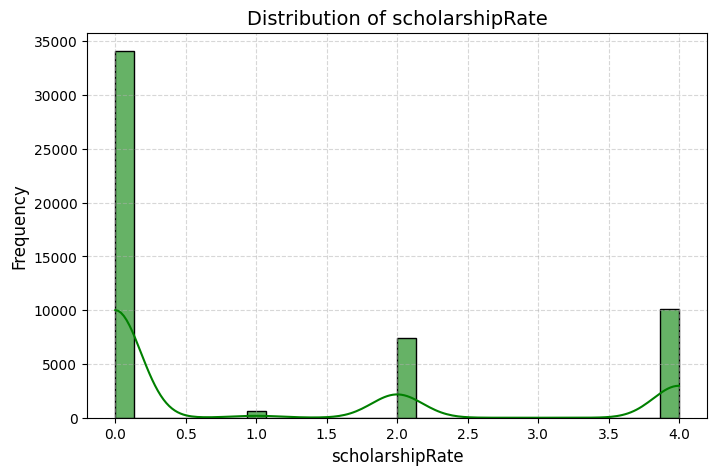

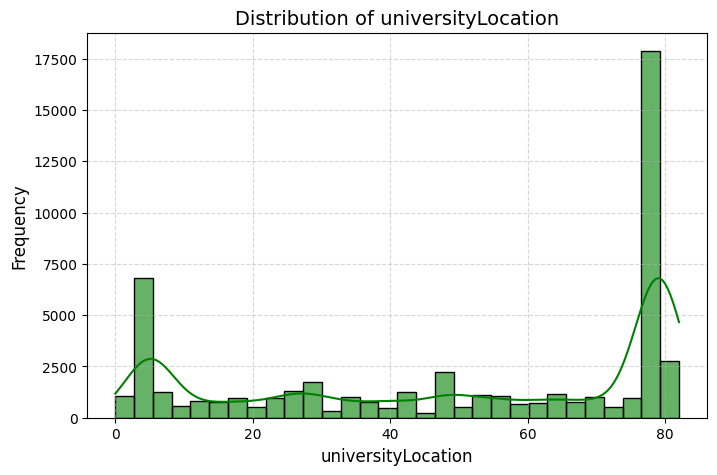

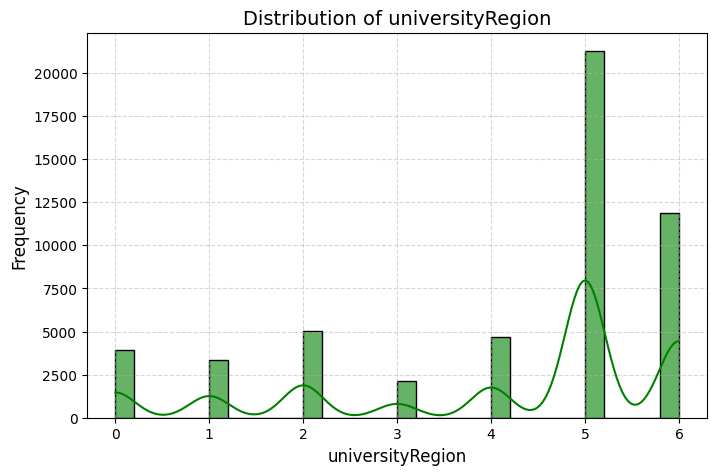

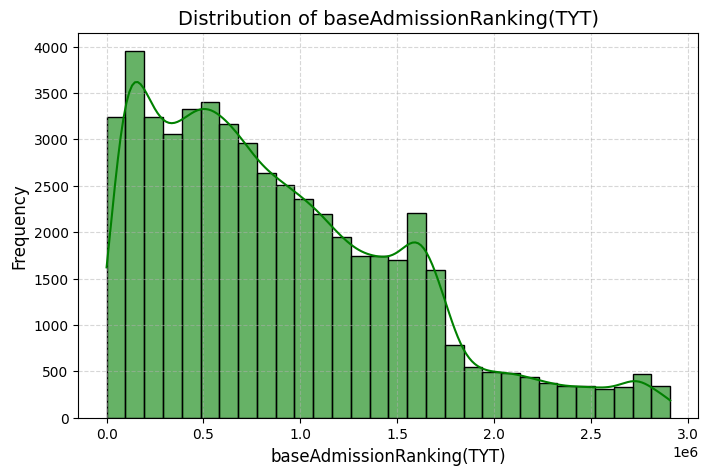

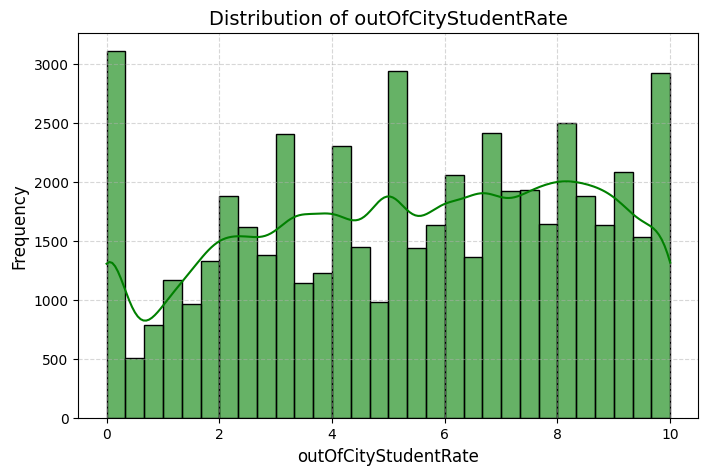

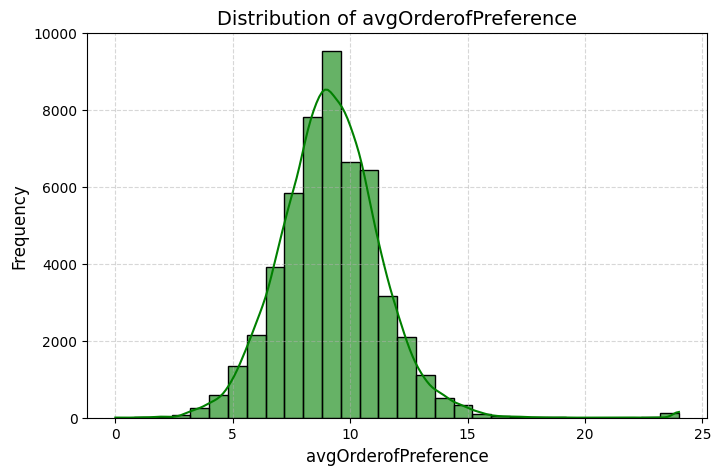

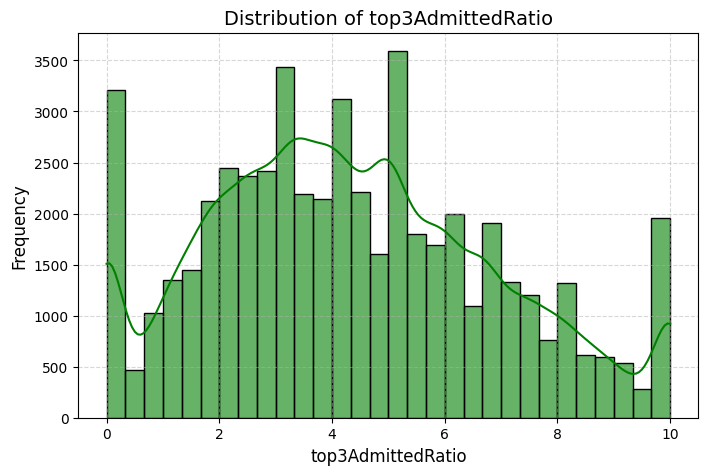

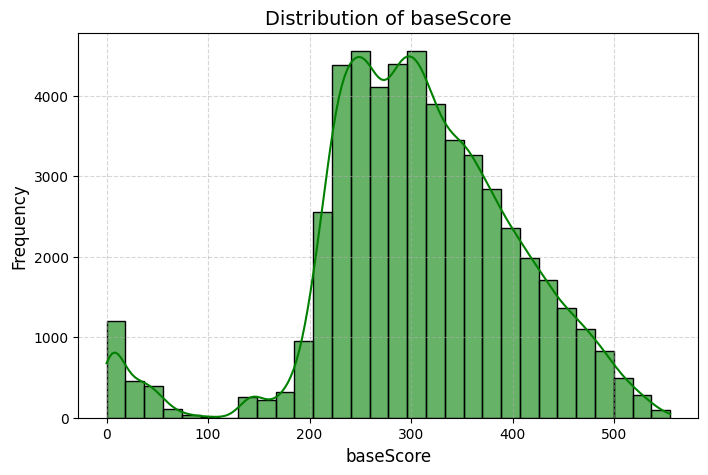

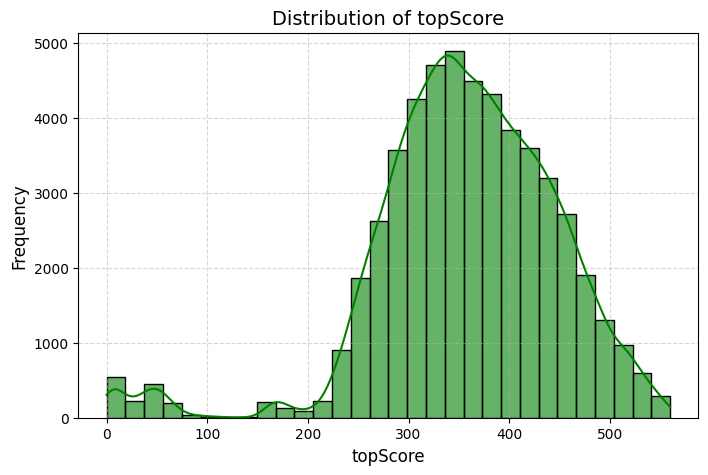

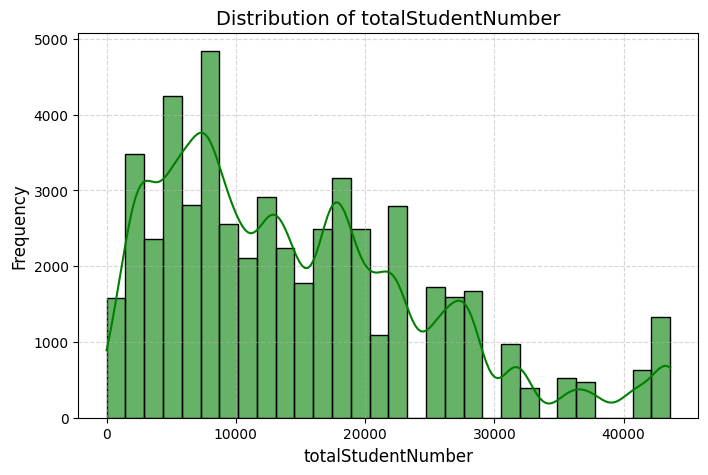

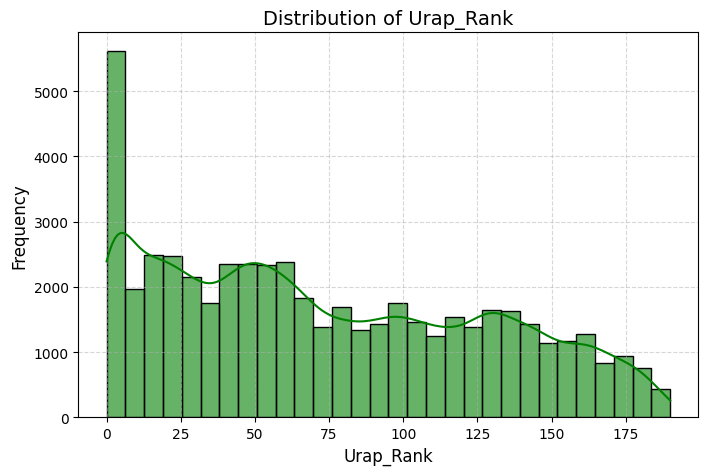

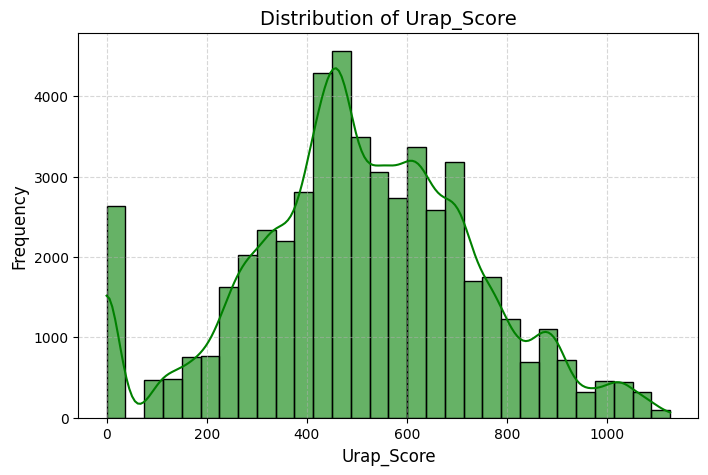

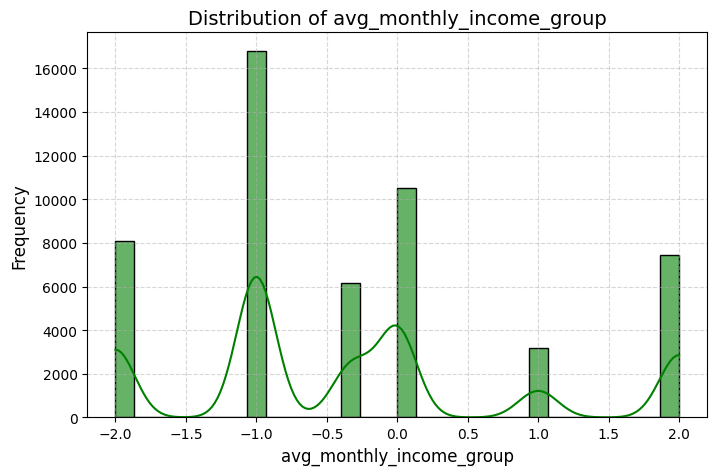

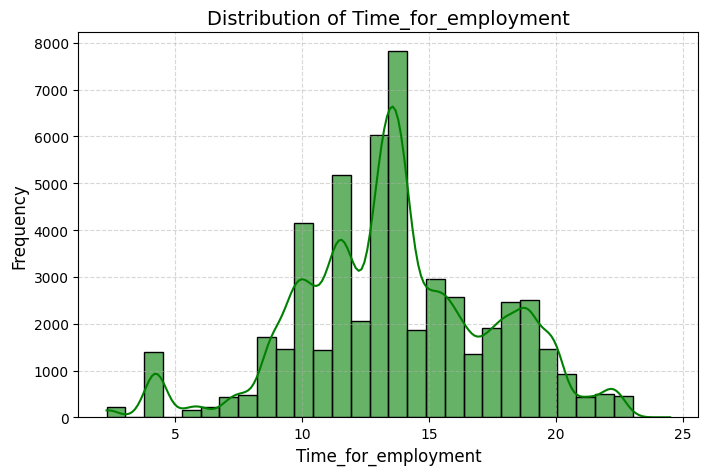

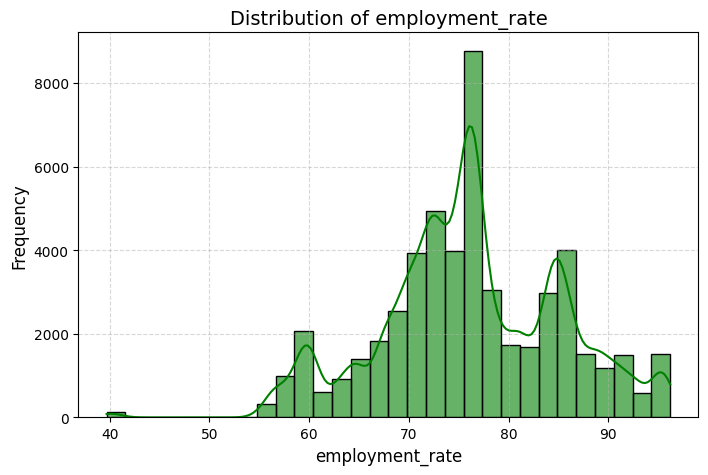

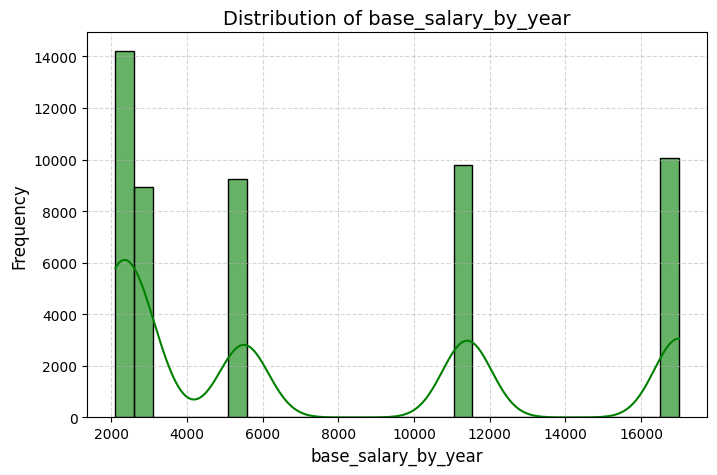

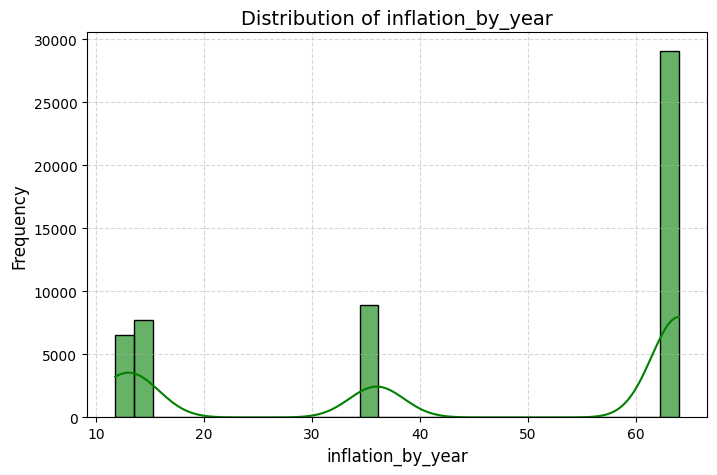

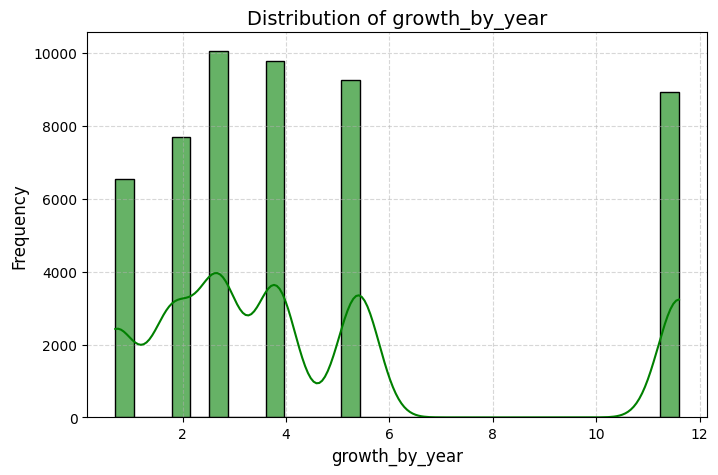

In [9]:
def plot_continuous_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='green', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_continuous_features(df, continuous_features)

In [ ]:
scaler_standard = StandardScaler()

# Step 1: Apply log transformation to skewed features
df[skew_features] = df[skew_features] + 0.1  # Add small constant to avoid log(0)
df[skew_features] = np.log1p(df[skew_features])

# Step 2: Combine all features into a single dataset
numeric_features = continuous_features + skew_features

# Step 3: Change to int
df[numeric_features] = df[numeric_features].astype(float)

# Step 3: Apply the same scaling to all features
preprocessor = ColumnTransformer(
    transformers=[
        ('all', scaler_standard, numeric_features),
        ('binary', 'passthrough', binary_features)
    ]
)

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=numeric_features+binary_features)

# Print descriptive statistics
print(processed_df.describe().round(3))

       universityName    faculty  departmentName     idOSYM  scholarshipRate  \
count       52221.000  52221.000       52221.000  52221.000        52221.000   
mean            0.518      0.512           0.524      0.404            0.268   
std             0.294      0.223           0.273      0.437            0.398   
min             0.000      0.000           0.000      0.000            0.000   
25%             0.250      0.265           0.289      0.043            0.000   
50%             0.534      0.476           0.506      0.084            0.000   
75%             0.784      0.655           0.764      0.930            0.500   
max             1.000      1.000           1.000      1.000            1.000   

       universityLocation  universityRegion  baseAdmissionRanking(TYT)  \
count           52221.000         52221.000                  52221.000   
mean                0.614             0.689                      0.309   
std                 0.361             0.312              

In [13]:
print(processed_df.head())

   universityName   faculty  departmentName    idOSYM  scholarshipRate  \
0             0.0  0.619808        0.631024  0.058027              0.0   
1             0.0  0.619808        0.631024  0.058027              0.0   
2             0.0  0.619808        0.631024  0.058027              0.0   
3             0.0  0.619808        0.631024  0.058027              0.0   
4             0.0  0.619808        0.631024  0.058027              0.0   

   universityLocation  universityRegion  baseAdmissionRanking(TYT)  \
0                 0.5               1.0                   0.172142   
1                 0.5               1.0                   0.153285   
2                 0.5               1.0                   0.128709   
3                 0.5               1.0                   0.144922   
4                 0.5               1.0                   0.107229   

   outOfCityStudentRate  avgOrderofPreference  ...  language_Korece  \
0                 0.417              0.333333  ...             

In [14]:
processed_df.to_csv('train.csv', index=False)

In [15]:
## Print data types
print(processed_df.dtypes)

universityName         float64
faculty                float64
departmentName         float64
idOSYM                 float64
scholarshipRate        float64
                        ...   
language_İngilizce     float64
language_İspanyolca    float64
language_İtalyanca     float64
baseRanking            float64
academicYear           float64
Length: 62, dtype: object
